Random Forest Model

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (modify the file path as per your setup)
file_path = 'datasets/train/train_text_seq.csv'
data = pd.read_csv(file_path)

# Preprocess: Extract first 20 characters from 'input_str'
data['input_str'] = data['input_str'].str[:20]

# Define features (X) and labels (y)
X = data['input_str']
y = data['label']

# Apply TF-IDF transformation with N-grams (bigrams)
tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+', ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Load the validation dataset
valid_file_path = 'datasets/valid/valid_text_seq.csv'  # Modify this path as necessary
valid_data = pd.read_csv(valid_file_path)

# Preprocess the validation data
valid_data['input_str'] = valid_data['input_str'].str[:20]
X_val = valid_data['input_str']
y_val = valid_data['label']

# Transform validation data using the same TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Initialize the models
svm_model = SVC()
log_reg_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()

# Train and evaluate SVM model
svm_model.fit(X_tfidf, y)  # Train on the entire dataset
y_pred_svm_tfidf = svm_model.predict(X_val_tfidf)  # Predict on the validation set
svm_accuracy_tfidf = accuracy_score(y_val, y_pred_svm_tfidf)

# Train and evaluate Logistic Regression model
log_reg_model.fit(X_tfidf, y)  # Train on the entire dataset
y_pred_log_reg_tfidf = log_reg_model.predict(X_val_tfidf)  # Predict on the validation set
log_reg_accuracy_tfidf = accuracy_score(y_val, y_pred_log_reg_tfidf)

# Train and evaluate Random Forest model
rf_model.fit(X_tfidf, y)  # Train on the entire dataset
y_pred_rf_tfidf = rf_model.predict(X_val_tfidf)  # Predict on the validation set
rf_accuracy_tfidf = accuracy_score(y_val, y_pred_rf_tfidf)

# Output the accuracy of each model
print(f"SVM Accuracy: {svm_accuracy_tfidf * 100:.2f}%")
print(f"Logistic Regression Accuracy: {log_reg_accuracy_tfidf * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy_tfidf * 100:.2f}%")


SVM Accuracy: 50.72%
Logistic Regression Accuracy: 50.72%
Random Forest Accuracy: 50.72%


Keras Model

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.metrics import accuracy_score

# Load your training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Tokenize the input sequences using training data
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(train_data['input_str'].astype(str))

# Convert text sequences to integer sequences for training and validation data
X_train_seq = tokenizer.texts_to_sequences(train_data['input_str'].astype(str))
X_val_seq = tokenizer.texts_to_sequences(valid_data['input_str'].astype(str))

# Pad sequences to ensure uniform input length
max_len = 50  # Padding length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

# Extract labels for both datasets
y_train = train_data['label']
y_val = valid_data['label']

# Build the Keras model
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=20, batch_size=32)

# Predict on the validation set
y_val_pred = model.predict(X_val_pad)
y_val_pred_class = (y_val_pred > 0.5).astype("int32")

# Calculate validation accuracy
accuracy = accuracy_score(y_val, y_val_pred_class)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Optional: Evaluate the model on the validation set (loss and accuracy)
loss, val_accuracy = model.evaluate(X_val_pad, y_val)
print(f"Validation Accuracy (from evaluation): {val_accuracy * 100:.2f}%")

model.summary()

c:\Users\riyan\Documents\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5220 - loss: 0.6921
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.6204 - loss: 0.6693
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.6723 - loss: 0.6207
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.6762 - loss: 0.5959
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.6904 - loss: 0.5801
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.6986 - loss: 0.5758
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7077 - loss: 0.5670
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6937 - loss: 0.5824
Epoch 9/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7115 - loss: 0.5707
Epoch 10/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - loss: 0.5612
Epoch 11/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.7047 - loss: 0.5618
Epoch 12/20
222/222 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 32)         │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,861 (22.90 KB)

 Trainable params: 1,953 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,908 (15.27 KB)

LSTM + Embedding

In [7]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

# Load your training and validation datasets
train_data = pd.read_csv('datasets/train/train_text_seq.csv')
valid_data = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Tokenize the input sequences using training data
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(train_data['input_str'].astype(str))

# Convert text sequences to integer sequences for training and validation data
X_train_seq = tokenizer.texts_to_sequences(train_data['input_str'].astype(str))
X_val_seq = tokenizer.texts_to_sequences(valid_data['input_str'].astype(str))

# Pad sequences to ensure uniform input length
max_len = 50  # Padding length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

# Extract labels for both datasets
y_train = train_data['label']
y_val = valid_data['label']

# Build the Keras model with LSTM and Dropout
vocab_size = len(tokenizer.word_index) + 1

# Adjust embedding dimension and LSTM units to reduce parameters
embedding_dim = 8  # Reduce embedding dimension
lstm_units = 32    # Reduce LSTM units

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# LSTM layer to capture sequential dependencies
model.add(LSTM(lstm_units, return_sequences=False))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a smaller batch size and more epochs
model.fit(X_train_pad, y_train, epochs=25, batch_size=16)

# Predict on the validation set
y_val_pred = model.predict(X_val_pad)
y_val_pred_class = (y_val_pred > 0.5).astype("int32")

# Calculate validation accuracy
accuracy = accuracy_score(y_val, y_val_pred_class)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Optional: Evaluate the model on the validation set
loss, val_accuracy = model.evaluate(X_val_pad, y_val)
print(f"Validation Accuracy (from evaluation): {val_accuracy * 100:.2f}%")

# Show the model summary to check trainable parameters
model.summary()


Epoch 1/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5166 - loss: 0.6928
Epoch 2/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5987 - loss: 0.6694
Epoch 3/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6049 - loss: 0.6613
Epoch 4/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6181 - loss: 0.6492
Epoch 5/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6155 - loss: 0.6518
Epoch 6/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6299 - loss: 0.6423
Epoch 7/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6207 - loss: 0.6383
Epoch 8/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6386 - loss: 0.6309
Epoch 9/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6472 - loss: 0.6261
Epoch 10/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6536 - loss: 0.6222
Epoch 11/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6530 - loss: 0.6171
Epoch 12/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/s

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 50, 8)          │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,109 (62.93 KB)

 Trainable params: 5,369 (20.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,740 (41.96 KB)

CNN + LSTM

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
import matplotlib.pyplot as plt

# Load training data
df_train = pd.read_csv('datasets/train/train_text_seq.csv')

# Load validation data
df_val = pd.read_csv('datasets/valid/valid_text_seq.csv')

# Preprocess training data
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])

input_str_train = df_train['input_str']
labels_train = df_train['label']

# Convert input string to numerical representation for training
input_seq_train = []
for seq in input_str_train:
    seq = [int(x) for x in seq]
    input_seq_train.append(seq)

# Pad sequences for training
max_length = 50
padded_seq_train = pad_sequences(input_seq_train, maxlen=max_length)

# One-hot encode labels for training
num_classes = 2
labels_train = to_categorical(labels_train, num_classes)

# Preprocess validation data
df_val['label'] = le.transform(df_val['label'])  # Using the same label encoder as the training data
input_str_val = df_val['input_str']
labels_val = df_val['label']

# Convert input string to numerical representation for validation
input_seq_val = []
for seq in input_str_val:
    seq = [int(x) for x in seq]
    input_seq_val.append(seq)

# Pad sequences for validation
padded_seq_val = pad_sequences(input_seq_val, maxlen=max_length)

# One-hot encode labels for validation
labels_val = to_categorical(labels_val, num_classes)

# Define model architecture
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=64, input_length=max_length))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=32, dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 20 epochs (no early stopping)
history = model.fit(padded_seq_train, labels_train, epochs=20, batch_size=32, validation_data=(padded_seq_val, labels_val))

# Display the number of trainable parameters
model.summary()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(padded_seq_val, labels_val, verbose=0)
print(f'Validation accuracy: {val_accuracy:.4f}')


Epoch 1/20


c:\Users\riyan\Documents\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5260 - loss: 0.6889 - val_accuracy: 0.6503 - val_loss: 0.6308
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6510 - loss: 0.6254 - val_accuracy: 0.6973 - val_loss: 0.5875
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6959 - loss: 0.5786 - val_accuracy: 0.7035 - val_loss: 0.5523
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7204 - loss: 0.5456 - val_accuracy: 0.7444 - val_loss: 0.5163
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7371 - loss: 0.5305 - val_accuracy: 0.7301 - val_loss: 0.5118
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7438 - loss: 0.5112 - val_accuracy: 0.7566 - val_loss: 0.4972
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7659 - loss: 0.4842 - val_accuracy: 0.7628 - val_loss: 0.5036
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7648 - loss: 0.4835 - val_accuracy: 0.7812 - v

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 50, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 16)         │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 24, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,200 (117.97 KB)

 Trainable params: 10,066 (39.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,134 (78.65 KB)

Validation accuracy: 0.8221


# BEST MODEL FOR THIS FEATURE

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

# Load the training data
data = pd.read_csv("datasets/train/train_text_seq.csv")
print(data.shape)

# Preprocess the training data
X = np.array([list(map(int, s)) for s in data['input_str']])  # Shape: (num_samples, 50)
y = data['label'].astype(int).values  # Convert labels to integers

# GRU-based model with reduced parameters
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=6, input_length=50))  # Embedding output_dim to 6
model.add(GRU(16, return_sequences=True))  # GRU layer with 16 units
model.add(Dropout(0.4))  # Dropout layer to prevent overfitting (adjusted dropout rate)
model.add(GRU(32))  # Another GRU layer with 32 units
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the entire training dataset
history = model.fit(X, y, epochs=30, batch_size=16)

# Get total number of parameters
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")
model.summary()

# Load the external validation dataset
valid_data = pd.read_csv("datasets/valid/valid_text_seq.csv")
print(valid_data.shape)

# Preprocess the validation data
X_test = np.array([list(map(int, s)) for s in valid_data['input_str']])  # Shape: (num_samples, 50)
y_test = valid_data['label'].astype(int).values  # Convert labels to integers

# Evaluate the model on the external validation dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Validation Dataset Accuracy: {test_acc*100:.2f}%")


(7080, 2)
Epoch 1/30


c:\Users\riyan\Documents\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


443/443 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5184 - loss: 0.6938
Epoch 2/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5600 - loss: 0.6849
Epoch 3/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6252 - loss: 0.6444
Epoch 4/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6415 - loss: 0.6276
Epoch 5/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6570 - loss: 0.6150
Epoch 6/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6745 - loss: 0.5946
Epoch 7/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6810 - loss: 0.5778
Epoch 8/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7191 - loss: 0.5393
Epoch 9/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7482 - loss: 0.5060
Epoch 10/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7672 - loss: 0.4723
Epoch 11/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7759 - loss: 0.4649
Epoch 12/30
443/443 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/st

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 6)          │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50, 16)         │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,137 (70.85 KB)

 Trainable params: 6,045 (23.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,092 (47.24 KB)

(489, 2)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8901 - loss: 0.2930
Validation Dataset Accuracy: 87.12%


c:\Users\riyan\Documents\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Percentage: 20%, Validation Accuracy: 68.71%
Percentage: 40%, Validation Accuracy: 76.28%
Percentage: 60%, Validation Accuracy: 76.28%
Percentage: 80%, Validation Accuracy: 83.03%
Percentage: 100%, Validation Accuracy: 86.09%


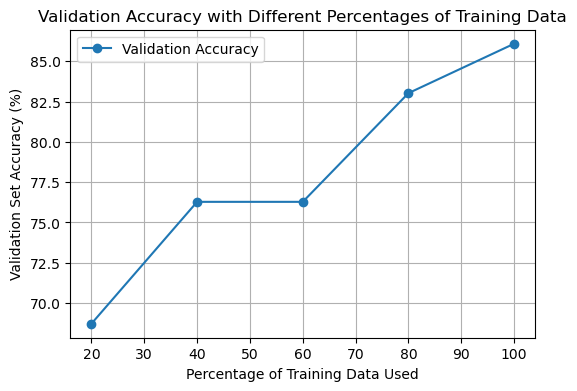

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the training data
data = pd.read_csv("datasets/train/train_text_seq.csv")

# Preprocess the training data
X = np.array([list(map(int, s)) for s in data['input_str']])  # Shape: (num_samples, 50)
y = data['label'].astype(int).values  # Convert labels to integers

# Load the external validation dataset
valid_data = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Preprocess the validation data
X_test = np.array([list(map(int, s)) for s in valid_data['input_str']])  # Shape: (num_samples, 50)
y_test = valid_data['label'].astype(int).values  # Convert labels to integers

# List of percentages to try
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
val_accuracies = []

# Function to create the GRU model
def create_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=10, output_dim=6, input_length=50))  # Reduced Embedding output_dim to 6
    model.add(GRU(16, return_sequences=True))  # Reduced GRU units to 16
    model.add(Dropout(0.4))  # Dropout layer to prevent overfitting (adjusted dropout rate)
    model.add(GRU(32))  # Another GRU layer with 32 units
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train on different percentages of the training data
for p in percentages:
    # Calculate number of samples to use
    n_samples = int(len(X) * p)

    # Split the data for the current percentage
    X_subset, y_subset = X[:n_samples], y[:n_samples]

    # Create a new model for each percentage
    model = create_gru_model()

    # Train the model
    history = model.fit(X_subset, y_subset, epochs=30, batch_size=16, verbose=0)

    # Evaluate the model on the validation data
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    val_accuracies.append(test_acc)

    print(f"Percentage: {int(p*100)}%, Validation Accuracy: {test_acc*100:.2f}%")

# Plot validation accuracy for each percentage of training data used
plt.figure(figsize=(6, 4))
plt.plot([int(p*100) for p in percentages], [acc*100 for acc in val_accuracies], marker='o', label='Validation Accuracy')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Set Accuracy (%)')
plt.title('Validation Accuracy with Different Percentages of Training Data')
plt.grid()
plt.legend()
plt.show()
